In [19]:
import ast
import os
from pathlib import Path

import pandas as pd
from matplotlib import pyplot as plt

# Get list of all CSV files in the directory
list_of_files = list(Path("../../logs/performance").rglob("*.csv"))

# Find the latest file
latest_file = max(list_of_files, key=os.path.getctime)

# Load the latest CSV file into a DataFrame
df_latest = pd.read_csv(latest_file)
# format: "timestamp", "category", "test_name","query", "scenario",
# "execution_time""cache_hits", "cache_misses", "cache_size","results_consistent",

print(df_latest)

# First check the unique category values to see what we're working with
print("Unique categories:", df_latest["category"].unique())

# Strip whitespace and normalize the category column
df_latest["category"] = df_latest["category"].str.strip()

               timestamp              category                 test_name  \
0    2025-03-19 13:17:01  base_keyword_queries          simple_keyword_1   
1    2025-03-19 13:17:01  base_keyword_queries          simple_keyword_1   
2    2025-03-19 13:17:01  base_keyword_queries          simple_keyword_2   
3    2025-03-19 13:17:01  base_keyword_queries          simple_keyword_2   
4    2025-03-19 13:17:01  base_keyword_queries          simple_keyword_3   
..                   ...                   ...                       ...   
137  2025-03-19 13:30:08    mixed_combinations  mixed_combination_AND_50   
138  2025-03-19 13:30:17    mixed_combinations  mixed_combination_AND_51   
139  2025-03-19 13:30:17    mixed_combinations  mixed_combination_AND_51   
140  2025-03-19 13:31:21    mixed_combinations  mixed_combination_AND_52   
141  2025-03-19 13:31:21    mixed_combinations  mixed_combination_AND_52   

                                                 query      scenario  \
0              

In [20]:
# Filter the DataFrame by category with stripped values
base_keyword_queries = df_latest[df_latest["category"] == "base_keyword_queries"]
base_keyword_queries = base_keyword_queries[base_keyword_queries["results_consistent"]]
base_percentile_queries = df_latest[df_latest["category"] == "base_percentile_queries"]
base_percentile_queries = base_percentile_queries[
    base_percentile_queries["results_consistent"]
].reset_index()
keyword_combinations = df_latest[df_latest["category"] == "keyword_combinations"]
keyword_combinations = keyword_combinations[
    keyword_combinations["results_consistent"]
].reset_index()
percentile_combinations = df_latest[df_latest["category"] == "percentile_combinations"]
percentile_combinations = percentile_combinations[
    percentile_combinations["results_consistent"]
].reset_index()
mixed_combinations = df_latest[df_latest["category"] == "mixed_combinations"]
mixed_combinations = mixed_combinations[
    mixed_combinations["results_consistent"]
].reset_index()

# Print to verify the filtering worked
print("\nCounts after fixing whitespace:")
print("Base keyword queries:", len(base_keyword_queries))
print("Base percentile queries:", len(base_percentile_queries))
print("Keyword combinations:", len(keyword_combinations))
print("Percentile combinations:", len(percentile_combinations))
print("Mixed combinations:", len(mixed_combinations))


Counts after fixing whitespace:
Base keyword queries: 22
Base percentile queries: 16
Keyword combinations: 0
Percentile combinations: 0
Mixed combinations: 26


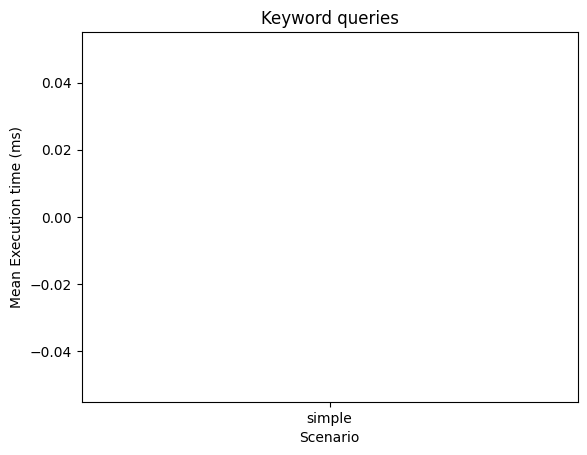

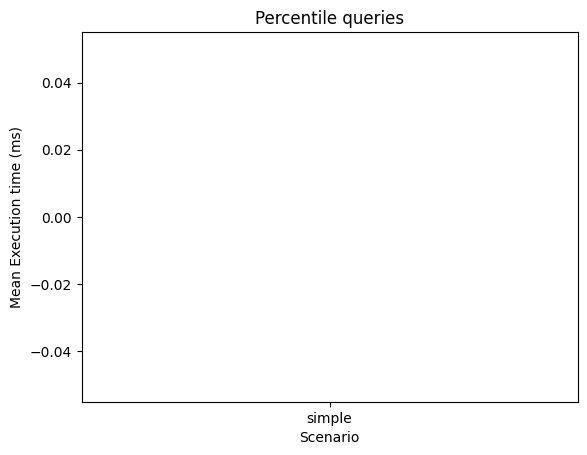

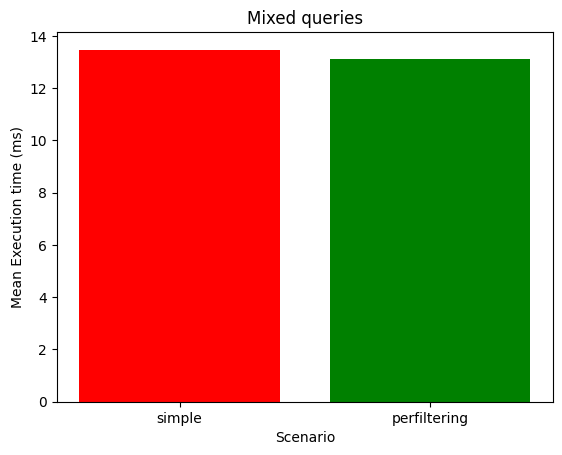

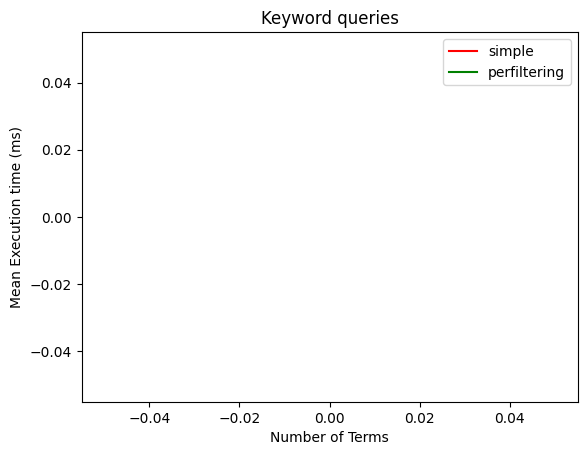

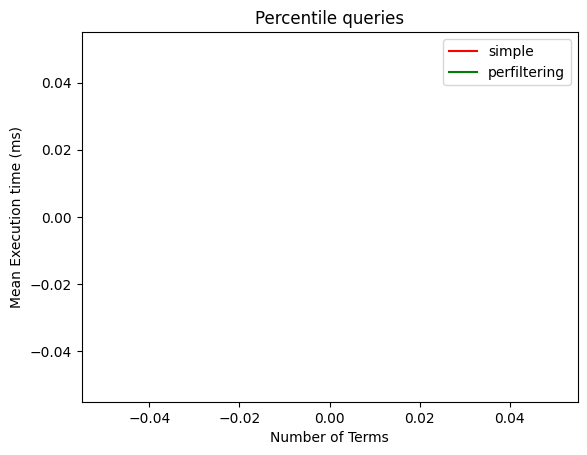

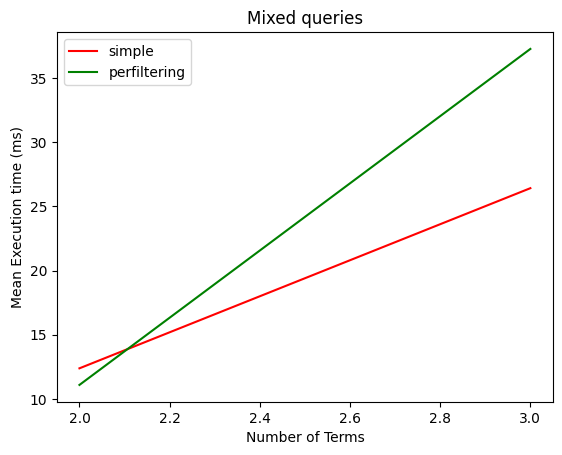

In [22]:
# compare the execution time of the keyword queries
# and the execution time of the percentile queries
# with different scenarios in two separate plots with bar charts

plt.figure()

# get the unique scenarios
scenarios = base_keyword_queries["scenario"].unique()
colors = ["r", "g", "b", "y", "c", "m", "k"]

for i, scenario in enumerate(scenarios):
    df_keyword = keyword_combinations[keyword_combinations["scenario"] == scenario]

    plt.bar(
        scenario,
        df_keyword["execution_time"].mean(),
        color=colors[i],
    )

plt.xlabel("Scenario")
plt.ylabel("Mean Execution time (ms)")
plt.title("Keyword queries")

plt.figure()

for i, scenario in enumerate(scenarios):
    df_percentile = percentile_combinations[
        percentile_combinations["scenario"] == scenario
    ]

    plt.bar(
        scenario,
        df_percentile["execution_time"].mean(),
        color=colors[i],
    )

plt.xlabel("Scenario")
plt.ylabel("Mean Execution time (ms)")
plt.title("Percentile queries")

plt.figure()

for i, scenario in enumerate(scenarios):
    df_mixed = mixed_combinations[mixed_combinations["scenario"] == scenario]

    plt.bar(
        scenario,
        df_mixed["execution_time"].mean(),
        color=colors[i],
    )

plt.xlabel("Scenario")
plt.ylabel("Mean Execution time (ms)")
plt.title("Mixed queries")

# compare the execution time of the keyword queries and percentile queries
# per number of terms in the query
# with different scenarios as separate lines in the same plot

plt.figure()

for i, scenario in enumerate(scenarios):
    df_keyword = keyword_combinations[keyword_combinations["scenario"] == scenario]

    mean_execution_times = df_keyword.groupby("num_terms")["execution_time"].mean()
    plt.plot(
        mean_execution_times.index,
        mean_execution_times.values,
        label=scenario,
        color=colors[i],
    )

plt.xlabel("Number of Terms")
plt.ylabel("Mean Execution time (ms)")
plt.title("Keyword queries")
plt.legend()

plt.figure()

for i, scenario in enumerate(scenarios):
    df_percentile = percentile_combinations[
        percentile_combinations["scenario"] == scenario
    ]

    mean_execution_times = df_percentile.groupby("num_terms")["execution_time"].mean()
    plt.plot(
        mean_execution_times.index,
        mean_execution_times.values,
        label=scenario,
        color=colors[i],
    )

plt.xlabel("Number of Terms")
plt.ylabel("Mean Execution time (ms)")
plt.title("Percentile queries")
plt.legend()

# mixed combinations
plt.figure()

for i, scenario in enumerate(scenarios):
    df_mixed = mixed_combinations[mixed_combinations["scenario"] == scenario]

    mean_execution_times = df_mixed.groupby("num_terms")["execution_time"].mean()
    plt.plot(
        mean_execution_times.index,
        mean_execution_times.values,
        label=scenario,
        color=colors[i],
    )

plt.xlabel("Number of Terms")
plt.ylabel("Mean Execution time (ms)")
plt.title("Mixed queries")
plt.legend()

Text(0.5, 1.0, 'Base Queries Execution Time')

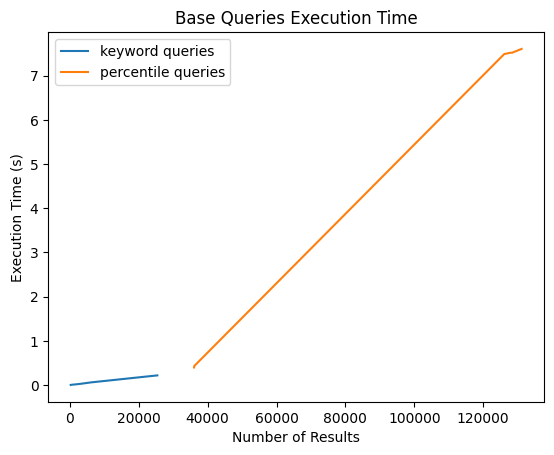

In [ ]:
# compare kw vs pp time for base queries (for cost based optimization)

# relevant columns: execution_time number_of_results (seneario is irrelevant for base queries)
plt.figure()

df = base_keyword_queries.groupby("num_results")["execution_time"].mean()

plt.plot(df.index, df, label="keyword queries")

df = base_percentile_queries.groupby("num_results")["execution_time"].mean()

plt.plot(df.index, df, label="percentile queries")

plt.xlabel("Number of Results")
plt.ylabel("Execution Time (s)")
plt.legend()
plt.title("Base Queries Execution Time")